In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory

228813984/228813984 [==============================] - 29s 0us/step


In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:

list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/14741813010_5d44e33088_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4868595281_1e58083785.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27465811_9477c9d044.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054864058_2edca122a9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6050020905_881295ac72_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3550491463_3eb092054c_m.jpg')]

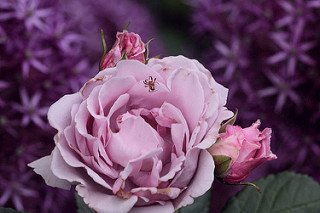

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
class_name = list(flowers_labels_dict.keys())
class_name

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [13]:

img.shape

(284, 320, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(X_train_scaled, y_train, epochs=30,validation_data = (X_test_scaled,y_test)) 

Epoch 1/30
86/86 [==============================] - 13s 37ms/step - loss: 1.4125 - accuracy: 0.3935 - val_loss: 1.1734 - val_accuracy: 0.5261
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0254 - accuracy: 0.6007 - val_loss: 1.0217 - val_accuracy: 0.5708
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8356 - accuracy: 0.6817 - val_loss: 0.9531 - val_accuracy: 0.6253
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6598 - accuracy: 0.7555 - val_loss: 0.9733 - val_accuracy: 0.6383
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.4313 - accuracy: 0.8445 - val_loss: 1.0510 - val_accuracy: 0.6100
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.2585 - accuracy: 0.9110 - val_loss: 1.3643 - val_accuracy: 0.6285
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.1454 - accuracy: 0.9553 - val_loss: 1.4724 - val_accuracy: 0.6481
Epoch 8/30
8

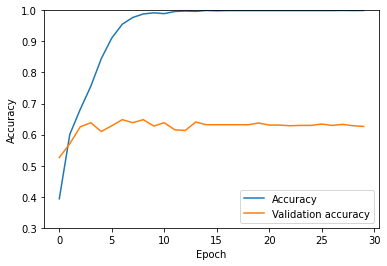

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

In [20]:

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 15ms/step - loss: 2.5182 - accuracy: 0.6264


[2.5182271003723145, 0.6263616681098938]

In [21]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 12ms/step


array([[  1.6650965 ,   6.815668  ,   0.11890637, -18.582172  ,
         -4.121254  ],
       [ 11.78939   ,  -8.742834  ,  -4.484734  , -11.041253  ,
          8.139495  ],
       [ -4.820472  ,  -0.78032917,  10.000293  ,  -5.7271338 ,
         -0.39603192],
       ...,
       [ -5.420407  ,  -2.5448964 ,   6.556186  ,   0.5601535 ,
         -4.700921  ],
       [  7.442527  ,  -3.063307  ,  -2.375284  ,  -7.6090517 ,
          4.457143  ],
       [  0.21794818, -10.199833  ,   0.67900693,   5.343671  ,
          7.6403947 ]], dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.7555204e-03, 9.9300063e-01, 1.2262609e-03, 9.2641918e-12,
       1.7664634e-05], dtype=float32)>

In [23]:

np.argmax(score)

1

In [24]:
y_test[0]

1

In [25]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [27]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              


In [28]:
history=model.fit(X_train_scaled, y_train, epochs=10,validation_data = (X_test_scaled,y_test)) 

Epoch 1/10
86/86 [==============================] - 9s 84ms/step - loss: 1.3094 - accuracy: 0.4393 - val_loss: 1.0928 - val_accuracy: 0.5523
Epoch 2/10
86/86 [==============================] - 4s 47ms/step - loss: 1.0310 - accuracy: 0.5908 - val_loss: 0.9829 - val_accuracy: 0.6166
Epoch 3/10
86/86 [==============================] - 4s 45ms/step - loss: 0.9119 - accuracy: 0.6443 - val_loss: 1.0348 - val_accuracy: 0.6078
Epoch 4/10
86/86 [==============================] - 4s 44ms/step - loss: 0.8592 - accuracy: 0.6675 - val_loss: 0.8537 - val_accuracy: 0.6667
Epoch 5/10
86/86 [==============================] - 4s 44ms/step - loss: 0.7968 - accuracy: 0.6966 - val_loss: 0.9665 - val_accuracy: 0.6133
Epoch 6/10
86/86 [==============================] - 4s 44ms/step - loss: 0.7719 - accuracy: 0.7020 - val_loss: 0.8989 - val_accuracy: 0.6525
Epoch 7/10
86/86 [==============================] - 4s 45ms/step - loss: 0.7175 - accuracy: 0.7209 - val_loss: 0.9409 - val_accuracy: 0.6678
Epoch 8/10
86

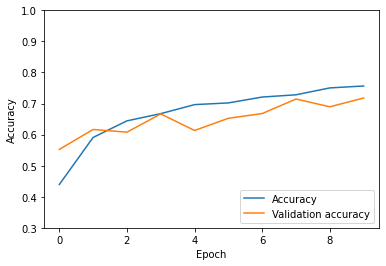

In [29]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

In [30]:

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 15ms/step - loss: 0.7520 - accuracy: 0.7179


[0.7520003318786621, 0.7178649306297302]

In [31]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[ 0.19866031,  1.3751451 , -0.9006886 , -1.2085365 , -0.38385668],
       [ 3.9983096 , -2.6293328 , -4.8015814 , -2.870521  ,  2.5184443 ],
       [-0.7841987 ,  0.3621811 ,  3.229697  , -2.592463  , -0.8425037 ],
       ...,
       [-1.0899954 ,  0.4457724 , -1.5759513 ,  1.5398173 , -0.6335423 ],
       [ 2.4786036 , -2.0907452 , -1.7907374 , -2.6003509 ,  1.0771027 ],
       [-1.0359391 , -3.4047756 ,  1.0059292 ,  1.3499997 ,  5.2333145 ]],
      dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.18589564, 0.60285115, 0.0619196 , 0.04551258, 0.10382103],
      dtype=float32)>

In [33]:

np.argmax(score)

1

In [34]:
y_test[0]

1